In [6]:
import pandas as pd
Walmart = pd.read_csv("Walmart Footfalls Raw.csv")

In [7]:
# Pre processing
import numpy as np

In [8]:
Walmart["t"] = np.arange(1,160)

In [9]:
Walmart["t_square"] = Walmart["t"] * Walmart["t"]
Walmart["log_footfalls"] = np.log(Walmart["Footfalls"])
Walmart.columns

Index(['Month', 'Footfalls', 't', 't_square', 'log_footfalls'], dtype='object')

In [10]:
p = Walmart["Month"][0]
p[0:3]

'Jan'

In [11]:
Walmart['months']= 0

for i in range(159):
    p = Walmart["Month"][i]
    Walmart['months'][i]= p[0:3]

C:\Users\hp\AppData\Local\Temp\ipykernel_476\2990431165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Walmart['months'][i]= p[0:3]
C:\Users\hp\AppData\Local\Temp\ipykernel_476\2990431165.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Jan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Walmart['months'][i]= p[0:3]


In [12]:
month_dummies = pd.DataFrame(pd.get_dummies(Walmart['months']))
Walmart1 = pd.concat([Walmart, month_dummies], axis = 1)


<Axes: >

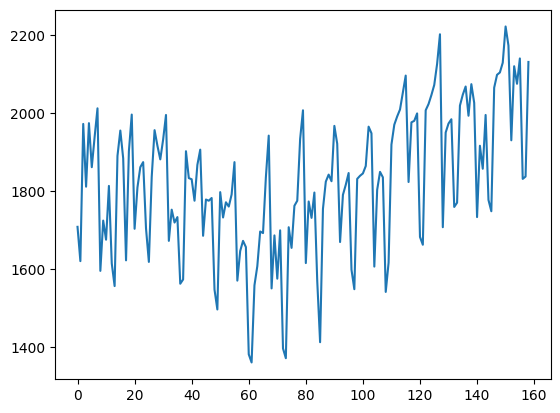

In [13]:
# Visualization - Time plot
Walmart1.Footfalls.plot()


In [14]:
# Data Partition
Train = Walmart1.head(147)
Test = Walmart1.tail(12)


In [15]:
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13))

####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Footfalls ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Footfalls']) - np.array(pred_linear))**2))
rmse_linear

209.92559265462572

In [16]:
##################### Exponential ##############################

Exp = smf.ols('log_footfalls ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Footfalls']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

217.0526356681339

In [17]:
#################### Quadratic ###############################

Quad = smf.ols('Footfalls ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Footfalls']) - np.array(pred_Quad))**2))
rmse_Quad

137.15462741356146

In [18]:
################### Additive seasonality ########################

add_sea = smf.ols('Footfalls ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls']) - np.array(pred_add_sea))**2))
rmse_add_sea

264.66439005687687

In [19]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_footfalls ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Footfalls']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.1970325309197

In [20]:
################## Additive Seasonality Quadratic Trend ############################

add_sea_Quad = smf.ols('Footfalls ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

50.60724584058861

In [21]:
################## Multiplicative Seasonality Linear Trend  ###########

Mul_Add_sea = smf.ols('log_footfalls ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

172.76726784670726

In [22]:
################## Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
2,rmse_Quad,137.154627
3,rmse_add_sea,264.664390
4,rmse_add_sea_quad,50.607246
5,rmse_Mult_sea,268.197033
6,rmse_Mult_add_sea,172.767268


In [24]:
# 'rmse_add_sea' has the least value among the models prepared so far Predicting new values 
predict_data = pd.read_csv("Predict_new.csv")


In [25]:
model_full = smf.ols('Footfalls ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Walmart1).fit()

In [26]:
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new

0     2193.807626
1     2229.969736
2     2200.670308
3     2311.293957
4     2356.071452
5     2036.848947
6     2187.241826
7     2181.480859
8     2234.104508
9     1999.997498
10    1972.995363
11    2280.493228
dtype: float64

In [27]:
predict_data["forecasted_Footfalls"] = pd.Series(pred_new)

In [28]:
# Autoregression Model (AR)
# Calculating Residuals from best model applied on full data
# AV - FV
full_res = Walmart1.Footfalls - model_full.predict(Walmart1)


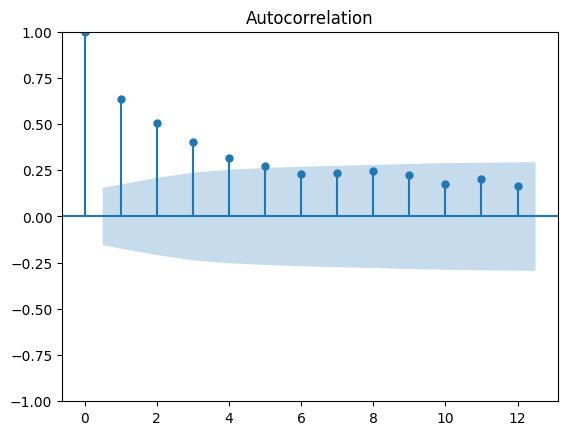

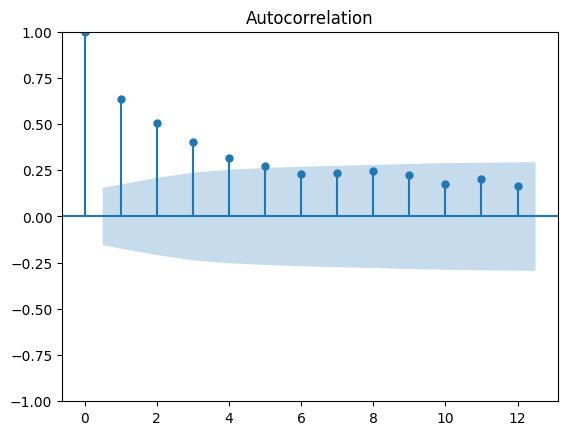

In [29]:
# ACF plot on residuals
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags = 12)
# Alternative approach for ACF plot
# from pandas.plotting import autocorrelation_plot
# autocorrelation_ppyplot.show()
          

In [30]:
# AR model
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[1])

In [31]:
# model_ar = AutoReg(Train_res, lags=12)
model_fit = model_ar.fit()


In [32]:
print('Coefficients: %s' % model_fit.params)


Coefficients: const   -0.543345
y.L1     0.638663
dtype: float64


In [33]:
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(predict_data)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)

In [34]:
# The Final Predictions using ASQT and AR(1) Model
final_pred = pred_new + pred_res
final_pred

0     2164.917162
1     2210.975131
2     2187.995818
3     2302.655889
4     2350.011295
5     2032.435206
6     2183.879589
7     2178.790179
8     2231.842726
9     1998.009637
10    1971.182445
11    2278.792040
dtype: float64

In [ ]:
probleam:- Walmart seeks to forecast customer footfall for their stores over the next few months. Accurate predictions will enable Walmart to optimize resource allocation, inventory management, and strategic planning, thereby improving customer service and operational efficiency. The objective is to develop a data-driven forecasting model using historical footfall data to provide reliable insights into future customer traffic patterns.